Installing Mediapipe

In [3]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 56.8 MB/s eta 0:00:00


Importing Dependencies

In [4]:
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from keras import regularizers

Mounting GDrive to access data files saved in Gdrive

In [5]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [6]:
cd drive/MyDrive/Datasets/ASL

/content/drive/MyDrive/Datasets/ASL


Loading and Preparing Train Data for FFNN

In [26]:
X = np.loadtxt('Megalist.txt')
Y = np.loadtxt('Megalabel.txt',dtype = str)
Y_data = [ord(i) - 65 for i in Y]
X_data = np.array(X)
eY = to_categorical(Y_data, num_classes = 26)
indices = np.arange(X_data.shape[0])
np.random.shuffle(indices)
X_data = X_data[indices]
eY = eY[indices]
eY = np.array([eY[i] for i in range(len(eY)) if np.sum(X_data[i]**2)!=0])
X_data = np.array([i  for i in X_data if np.sum(i**2)!=0])

len(X_data),len(eY)

(14284, 14284)

Loading and Preparing Validation and Test Data

In [27]:
vX = np.loadtxt('Valid_X_yolo.txt')
vY = np.loadtxt('Valid_Y_yolo.txt', dtype = str)
tX = np.loadtxt('Test_X_yolo.txt')
tY = np.loadtxt('Test_Y_yolo.txt', dtype = str)
vY = [ord(i) - 65 for i in vY]
tY = [ord(i) - 65 for i in tY]
vX = np.array(vX)
tX = np.array(tX)

Defining the model architecture

In [31]:
def baseline_model():
  model = Sequential()
  model.add(Dense(46, input_dim=63, activation='relu', kernel_regularizer=regularizers.L1(0.01)))
  model.add(Dense(26, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = baseline_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 46)                2944      
                                                                 
 dense_9 (Dense)             (None, 26)                1222      
                                                                 
Total params: 4166 (16.27 KB)
Trainable params: 4166 (16.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training the model

In [32]:
history = model.fit(X_data, eY, epochs=150, validation_split = 0.25 , verbose = 1)

Epoch 1/150
335/335 [==============================] - 1s 3ms/step - loss: 4.2995 - accuracy: 0.0849 - val_loss: 3.3034 - val_accuracy: 0.0809
Epoch 2/150
335/335 [==============================] - 1s 2ms/step - loss: 3.2000 - accuracy: 0.1180 - val_loss: 3.1014 - val_accuracy: 0.1739
Epoch 3/150
335/335 [==============================] - 1s 2ms/step - loss: 2.9761 - accuracy: 0.2027 - val_loss: 2.8380 - val_accuracy: 0.2246
Epoch 4/150
335/335 [==============================] - 1s 2ms/step - loss: 2.7105 - accuracy: 0.2540 - val_loss: 2.5965 - val_accuracy: 0.2862
Epoch 5/150
335/335 [==============================] - 1s 2ms/step - loss: 2.4943 - accuracy: 0.3233 - val_loss: 2.4030 - val_accuracy: 0.3937
Epoch 6/150
335/335 [==============================] - 1s 2ms/step - loss: 2.3193 - accuracy: 0.4495 - val_loss: 2.2418 - val_accuracy: 0.5085
Epoch 7/150
335/335 [==============================] - 1s 2ms/step - loss: 2.1781 - accuracy: 0.5268 - val_loss: 2.1111 - val_accuracy: 0.5466

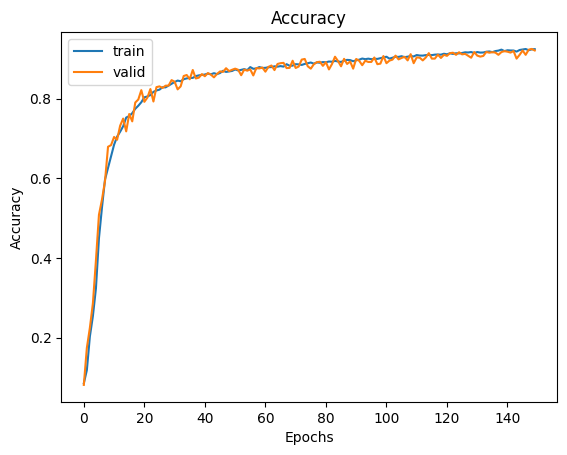

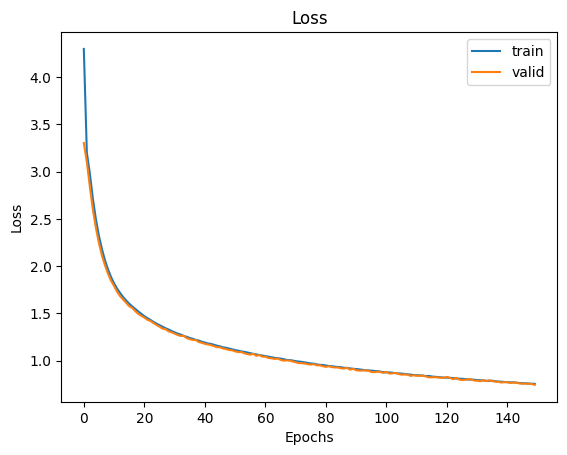

In [40]:
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','valid'])
plt.show()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])

Saving Model Weights

In [ ]:
model.save_weights('wcdata_2layers.h5')